## NLP & MultiClass Classification: Airline Twitter sentiment data
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 14640 Scraped Twitter data for major U.S. airlines including positive, negative, and neutral tweets

** Attribute Information:**

- _unit_id                      
- _golden                       
- _unit_state                    
- _trusted_judgments           
- _last_judgment_at            
- airline_sentiment              
- airline_sentiment:confidence    
- negativereason                  
- negativereason:confidence     
- airline                      
- airline_sentiment_gold          
- name                         
- negativereason_gold         
- retweet_count          
- text                       
- tweet_coord                     
- tweet_created                  
- tweet_id                        
- tweet_location                  
- user_timezone                   

** Objective of this project **

- predict sentiment from tweets

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='latin-1')
pd.set_option('display.max_colwidth', -1)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
df['text'].tail()

14635    @AmericanAir thank you we got on a different flight to Chicago.                                                                                       
14636    @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637    @AmericanAir Please bring American Airlines to #BlackBerry10                                                                                          
14638    @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??               
14639    @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?            
Name: text, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
_unit_id                        14640 non-null int64
_golden                         14640 non-null bool
_unit_state                     14640 non-null object
_trusted_judgments              14640 non-null int64
_last_judgment_at               14584 non-null object
airline_sentiment               14640 non-null object
airline_sentiment:confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason:confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 

In [5]:
df.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692184e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,7.791092e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.698902e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


# Exploratory Data Analysis

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

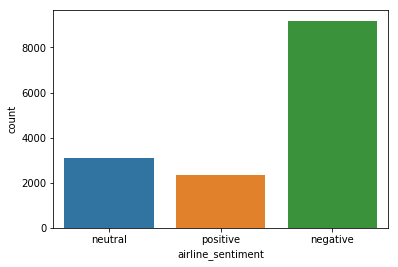

In [6]:
# inspect sentiment
sns.countplot(df['airline_sentiment'])
df['airline_sentiment'].value_counts() #imbalanced

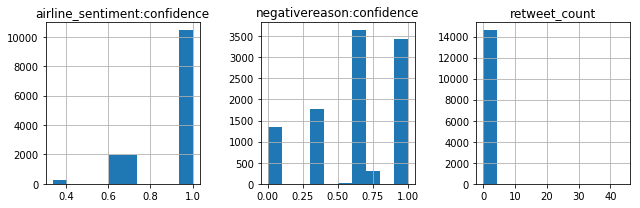

In [7]:
# numetic features
num_cols = ['airline_sentiment:confidence','negativereason:confidence','retweet_count']
df[num_cols].hist(layout=(1,3),figsize=(9,3))
plt.tight_layout()

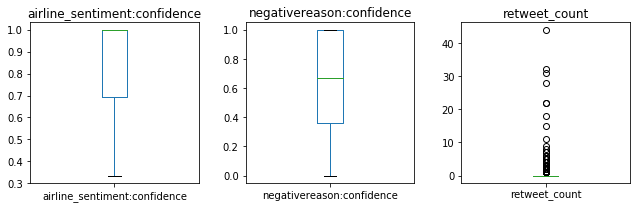

In [8]:
plt.figure(figsize=(9,3))
for i,name in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    _ = df[num_cols[i]].plot(kind='box',title=name)
plt.tight_layout()

In [9]:
# text length
df['text_length'] = df['text'].apply(len)
df[['airline_sentiment','text_length','text']].head()

,airline_sentiment,text_length,text
0,neutral,35,@VirginAmerica What @dhepburn said.
1,positive,72,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,71,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,126,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,55,@VirginAmerica and it's a really big bad thing about it


In [10]:
df['text_length'].describe()

count    14640.000000
mean     104.118511  
std      36.256550   
min      12.000000   
25%      77.000000   
50%      115.000000  
75%      136.000000  
max      229.000000  
Name: text_length, dtype: float64

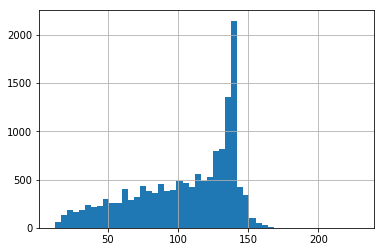

In [11]:
df['text_length'].hist(bins=50)

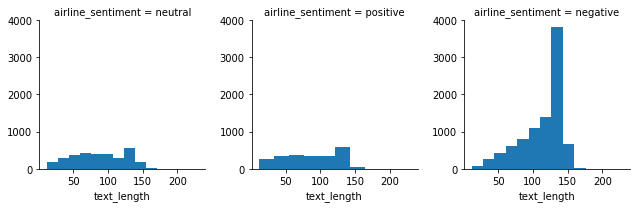

In [12]:
g = sns.FacetGrid(df,col='airline_sentiment')
g.map(plt.hist,'text_length')

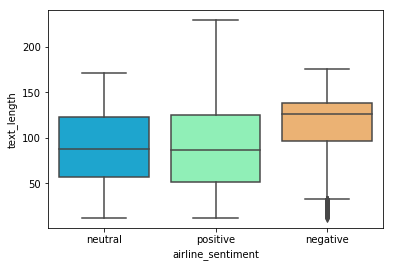

In [13]:
sns.boxplot(x='airline_sentiment',y='text_length',data=df,palette='rainbow')

In [14]:
sentiment = df.groupby('airline_sentiment').mean()
sentiment

,_unit_id,_golden,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id,text_length
airline_sentiment,,,,,,,,
negative,6.815016e+08,0.003487,3.789823,0.933365,0.731769,0.093375,5.692602e+17,114.093702
neutral,6.814867e+08,0.000968,3.221362,0.823303,0.000000,0.060987,5.691841e+17,87.785737
positive,6.814846e+08,0.002116,3.474820,0.872039,0.000000,0.069403,5.691006e+17,86.794329


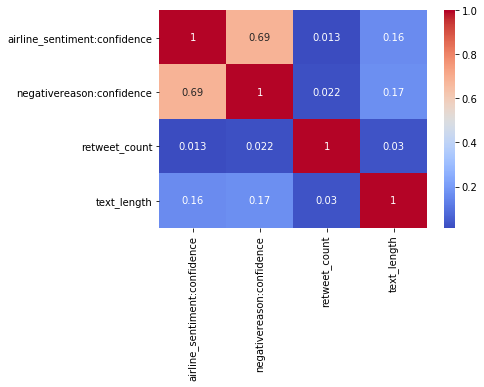

In [15]:
num_cols = num_cols + ['airline_sentiment','text_length']
sns.heatmap(df[num_cols].corr(), annot = True, cmap='coolwarm')

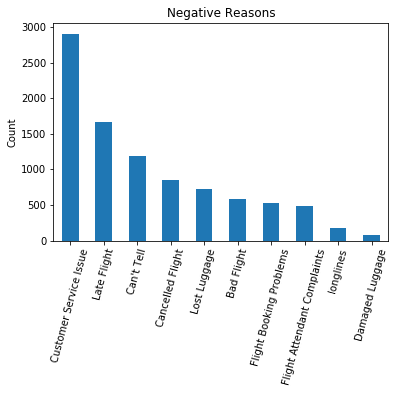

In [16]:
# negative reason
df['negativereason'].value_counts().plot(kind='bar', title='Negative Reasons')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

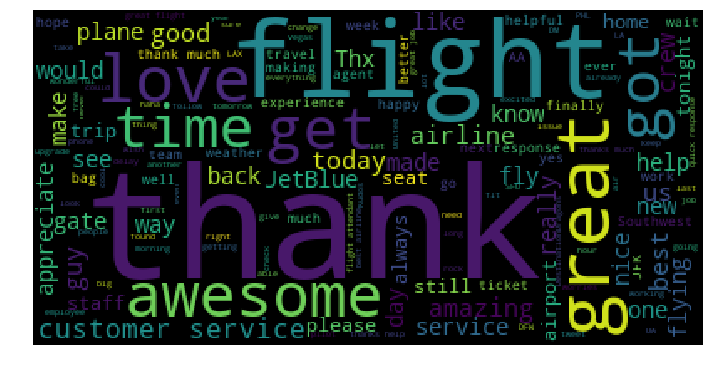

In [17]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def plot_word_cloud(sentiment):
    text = df[df['airline_sentiment']==sentiment]['text'].to_string()
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', '', text)
    #text = re.sub(r'#\S+', '', text)
    text = re.sub('&amp', ' ', text)    
    text = re.sub('[^a-zA-Z]', ' ', text)

    wordcloud = WordCloud(
        relative_scaling=0.5,
        stopwords=set(stopwords.words('english'))).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# positive
plot_word_cloud('positive')

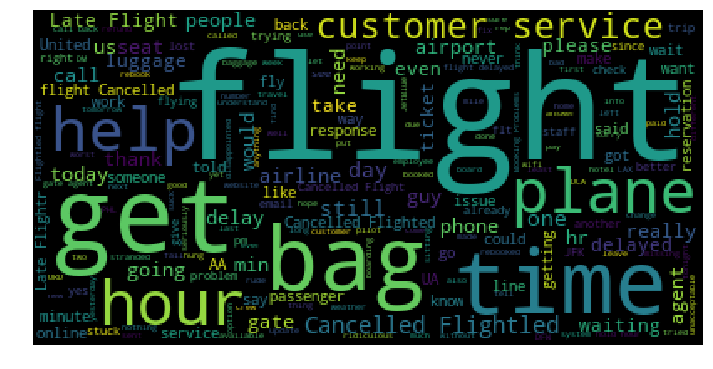

In [18]:
# negative
plot_word_cloud('negative')

# Data Preprocessing

#### Clean Text

In [19]:
df = df[['text','airline_sentiment']]

In [20]:
# remove urls & stopwords
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return ' '.join(filter(lambda word: word not in set(stopwords.words('english')), s.split()))
    
X = df['text'].apply(clean_text)

#### Encode Categorical to Dummy var

In [21]:
y = pd.get_dummies(df['airline_sentiment']).values
y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ..., 
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

#### Spilt Train Test sets

In [22]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11712,) (2928,) (11712, 3) (2928, 3)


#### Tokenize text

In [24]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [25]:
len(X_train)
#X_train[:10]
#tokenizer.word_counts
#tokenizer.word_index

11712

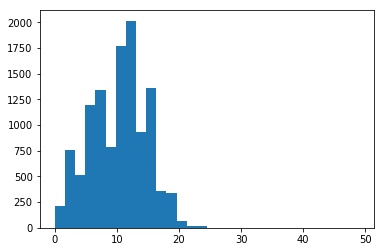

In [26]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [27]:
from keras.preprocessing import sequence
max_words = 25 #max(totalNumWords)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
#X_train[np.argmax(totalNumWords)]

(11712, 25) (2928, 25)


# 1. MLP

In [48]:
import keras.backend as K
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Dropout,Conv1D,MaxPooling1D,LSTM
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.callbacks import EarlyStopping

batch_size = 128
epochs = 25

In [49]:
def create_nn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    SVG(model_to_dot(model).create(prog='dot', format='svg'))
    print(model.summary())    
    return model

In [50]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [51]:
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               640200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
__________

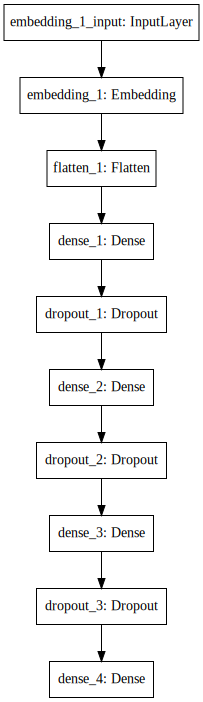

In [52]:
# create the model
model = create_nn()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Train on 11712 samples, validate on 2928 samples
Epoch 1/25
 - 7s - loss: 0.7874 - acc: 0.6621 - val_loss: 0.6228 - val_acc: 0.7459
Epoch 2/25
 - 6s - loss: 0.4526 - acc: 0.8134 - val_loss: 0.5799 - val_acc: 0.7780
Epoch 3/25
 - 6s - loss: 0.1985 - acc: 0.9298 - val_loss: 0.7476 - val_acc: 0.7637
Epoch 4/25
 - 6s - loss: 0.0862 - acc: 0.9752 - val_loss: 0.9707 - val_acc: 0.7568
Epoch 5/25
 - 6s - loss: 0.0508 - acc: 0.9855 - val_loss: 1.0927 - val_acc: 0.7592
Epoch 6/25
 - 6s - loss: 0.0343 - acc: 0.9893 - val_loss: 1.3231 - val_acc: 0.7449
Epoch 7/25
 - 6s - loss: 0.0249 - acc: 0.9919 - val_loss: 1.4271 - val_acc: 0.7548


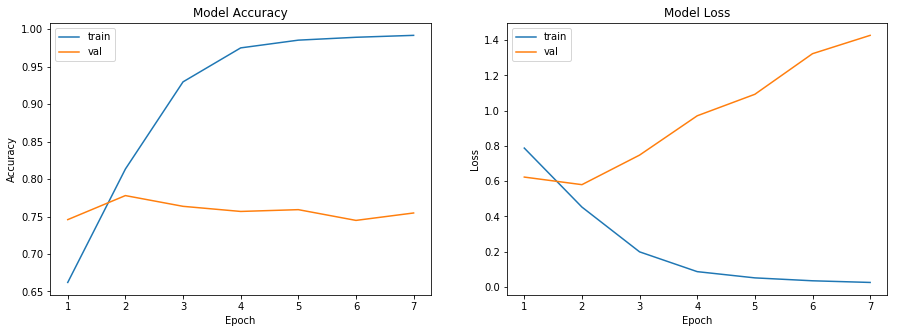

In [53]:
# callback
early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max') 
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          verbose=2, callbacks=[early_stop])
# plot train history
plot_model_history(model_history)

Accuracy:	75.5%


             precision    recall  f1-score   support

          0       0.82      0.89      0.85      1836
          1       0.59      0.47      0.53       620
          2       0.66      0.62      0.64       472

avg / total       0.74      0.75      0.75      2928



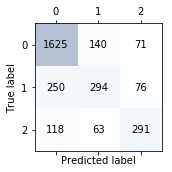

In [54]:
# evaluate model with test set
model_evaluate()

# 2. 1D CNN

In [55]:
def create_cnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                5790      
__________

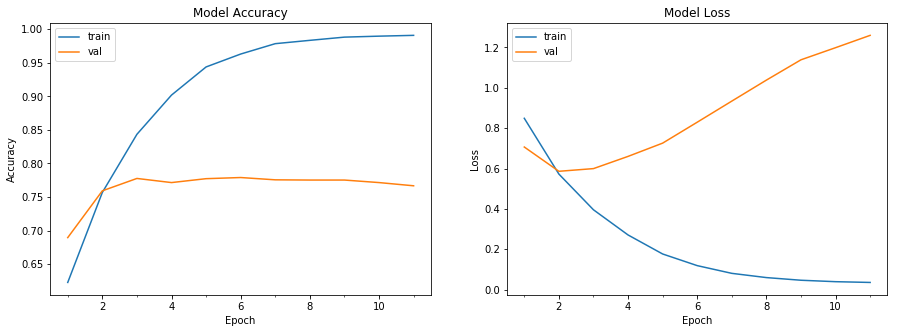

In [56]:
# create the model
model = create_cnn()
# callback
early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max') 
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          verbose=2, callbacks=[early_stop])
# plot train history
plot_model_history(model_history)

Accuracy:	76.7%


             precision    recall  f1-score   support

          0       0.85      0.86      0.86      1836
          1       0.59      0.59      0.59       620
          2       0.66      0.62      0.64       472

avg / total       0.77      0.77      0.77      2928



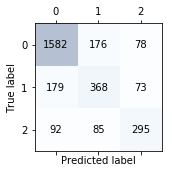

In [57]:
# evaluate model with test set
model_evaluate()

# 3. RNN

In [58]:
def create_rnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 93        
Total params: 1,374,723
Trainable params: 1,374,723
Non-trainable params: 0
_________________________________________________________________
None
Train on 11712 samples, validate on 2928 samples
Epoch 1/25
 - 16s - loss: 0.8064 - acc: 0.6690 - val_loss: 0.6269 - val_acc: 0

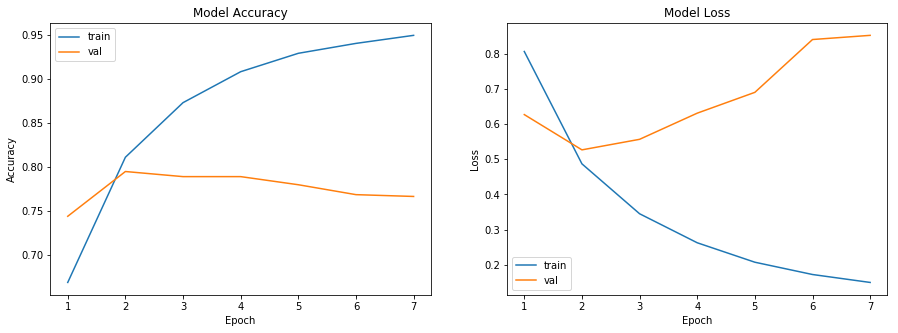

In [59]:
# create the model
model = create_rnn()
# callback
early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max') 
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          verbose=2, callbacks=[early_stop])
# plot train history
plot_model_history(model_history)

Accuracy:	76.7%


             precision    recall  f1-score   support

          0       0.84      0.87      0.86      1836
          1       0.58      0.54      0.56       620
          2       0.69      0.66      0.67       472

avg / total       0.76      0.77      0.76      2928



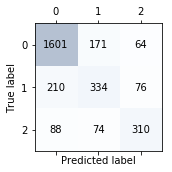

In [60]:
# evaluate model with test set
model_evaluate()

# 4. CNN + RNN

In [61]:
def create_cnn_rnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2, seed=seed))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
__________

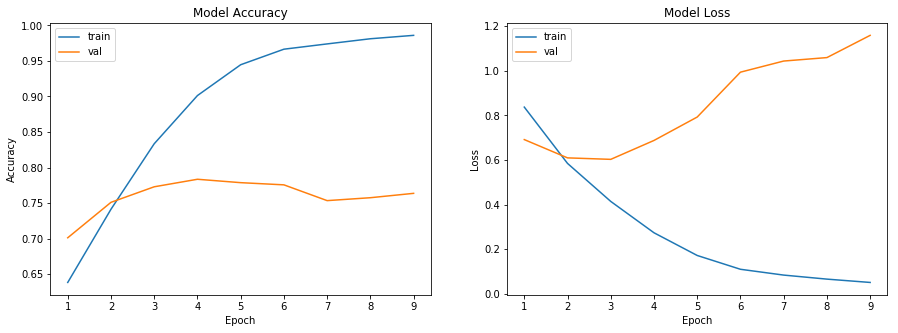

In [62]:
# create the model
model = create_cnn_rnn()
# callback
early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max') 
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          verbose=2, callbacks=[early_stop])
# plot train history
plot_model_history(model_history)

Accuracy:	76.4%


             precision    recall  f1-score   support

          0       0.85      0.86      0.86      1836
          1       0.57      0.55      0.56       620
          2       0.68      0.65      0.66       472

avg / total       0.76      0.76      0.76      2928



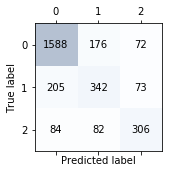

In [63]:
# evaluate model with test set
model_evaluate()